Using all PCs, MSE = 2.55652E-24
Using first 20 PCs, MSE = 51810.3


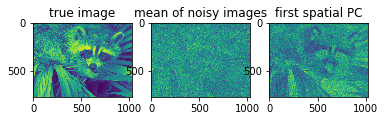

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.misc import ascent, face

# the underlying signal is a sinusoidally modulated image
#img = ascent()
img=face(gray=True)
t = np.arange(100)
time = np.sin(0.1*t)
real = time[:,np.newaxis,np.newaxis] * img[np.newaxis,...]

# we add some noise
noisy = real + np.random.randn(*real.shape)*255

# (observations, features) matrix
M = noisy.reshape(noisy.shape[0],-1)

# singular value decomposition factorises your data matrix such that:
# 
#   M = U*S*V.T     (where '*' is matrix multiplication)
# 
# * U and V are the singular matrices, containing orthogonal vectors of
#   unit length in their rows and columns respectively.
#
# * S is a diagonal matrix containing the singular values of M - these 
#   values squared divided by the number of observations will give the 
#   variance explained by each PC.
#
# * if M is considered to be an (observations, features) matrix, the PCs
#   themselves would correspond to the rows of S^(1/2)*V.T. if M is 
#   (features, observations) then the PCs would be the columns of
#   U*S^(1/2).
#
# * since U and V both contain orthonormal vectors, U*V.T is equivalent 
#   to a whitened version of M.

U, s, Vt = np.linalg.svd(M, full_matrices=False)
V = Vt.T

# PCs are already sorted by descending order 
# of the singular values (i.e. by the
# proportion of total variance they explain)

# if we use all of the PCs we can reconstruct the noisy signal perfectly
S = np.diag(s)
Mhat = np.dot(U, np.dot(S, V.T))
print("Using all PCs, MSE = %.6G" %(np.mean((M - Mhat)**2)))

# if we use only the first 20 PCs the reconstruction is less accurate
Mhat2 = np.dot(U[:, :20], np.dot(S[:20, :20], V[:,:20].T))
print("Using first 20 PCs, MSE = %.6G" %(np.mean((M - Mhat2)**2)))

fig, [ax1, ax2, ax3] = plt.subplots(1, 3)
ax1.imshow(img)
ax1.set_title('true image')
ax2.imshow(noisy.mean(0))
ax2.set_title('mean of noisy images')
ax3.imshow((s[0]**(1./2) * V[:,0]).reshape(img.shape))
#ax3.imshow(Mhat2.reshape(img.shape))
ax3.set_title('first spatial PC')
plt.show()

In [1]:
import sklearn.decomposition as deco
import numpy as np
# You need to normalize your data first:
x = (x - np.mean(x, 0)) / np.std(x, 0) 
# n_components is the components number after reduction:
pca = deco.PCA(n_components) 
x_r = pca.fit(x).transform(x)
print('explained variance (first %d components): %.2f'%(n_components, sum(pca.explained_variance_ratio_)))

NameError: name 'x' is not defined